### <b><div style='padding:8px;background-color:#003f88;color:white;border-radius:2px;font-size:100%;text-align: left'>Employee Attrition Prediction</div></b>
Employee attrition refers to the phenomenon of employees leaving an organization voluntarily or involuntarily. Predicting employee attrition can help organizations proactively identify and address factors that contribute to employee turnover.

Building a predictive model for employee attrition can provide valuable insights to optimize employee retention strategies.

This project aims to develop a machine learning algorithm for accurate and efficient detection of employee attrition.

##### Objectives:
  - To investigate the key features that  affect employee attrition
  - 
To determine the optimal machine learning algorithm for employee attrition prediction.

##### Import major Libraries

In [1]:
# Import major Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Training and scaling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import KFold  # Updated import for KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import metrics
from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# saving
import pickle
import joblib

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# Import the cleaned train dataset
data = pd.read_csv("train_data.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


##### Model Building

In [3]:
# Drop off some redundant features

data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours','MonthlyIncome', 'MonthlyRate'], axis=1, inplace=True)

In [4]:
# creating a copy of the dataset for model building
df = data.copy()

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       176
           1       0.64      0.44      0.52        36

    accuracy                           0.86       212
   macro avg       0.77      0.70      0.72       212
weighted avg       0.85      0.86      0.85       212



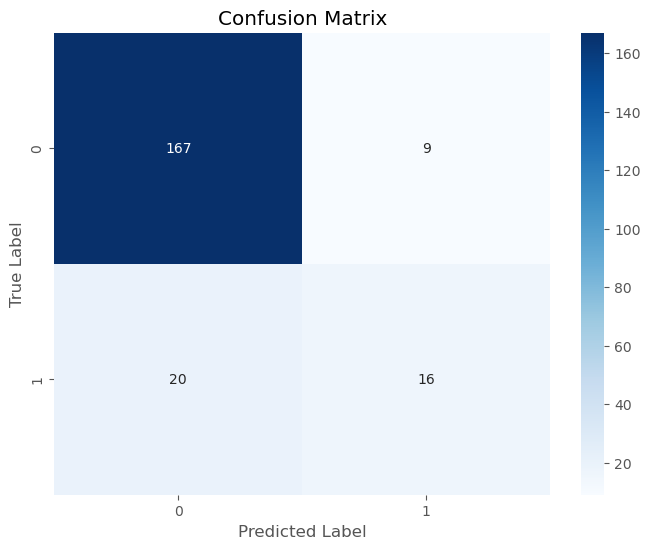

10-Fold Cross Validation Accuracy: 0.88 ± 0.03


['log_reg_attrition_model.pkl']

In [6]:
# Separate features and target variable
X = df.drop(columns=['Attrition'])  
y = df['Attrition']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
num_var = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_var = X_train.select_dtypes(include=['object']).columns

# Create the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_var),
        ('cat', OneHotEncoder(drop='first'), cat_var)
    ])

# Create a pipeline with the preprocessor and a classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Perform k-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring='accuracy')
print(f'10-Fold Cross Validation Accuracy: {cv_results.mean():.2f} ± {cv_results.std():.2f}')

# Save only the trained model (excluding preprocessing)
model = pipeline.named_steps['classifier']
joblib.dump(model, 'log_reg_attrition_model.pkl')


In [7]:
# Save the preprocessor (scaler and encoder)
joblib.dump(pipeline.named_steps['preprocessor'], 'preprocessor.pkl')

['preprocessor.pkl']

In [8]:
# Save the entire pipeline (includes preprocessor and model)
joblib.dump(pipeline, 'pipeline_with_model.pkl')

['pipeline_with_model.pkl']

#### Productionizing Our Model

We will use and unseen test data to test our model

In [9]:
# Import test dataset
test_data = pd.read_excel(r"C:\Users\Harrison\Downloads\employee_attrition\data\test.xlsx")
test_data.head(3)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0


In [10]:
test_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [13]:
# Apply transforms to the new data similar to the training dataset

test_data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)


In [11]:
# Load the saved pipeline
pipeline = joblib.load('pipeline_with_model.pkl')

# Make predictions on the unseen data
predictions = pipeline.predict(test_data)

test_data['Predicted_Attrition'] = predictions

# Display the DataFrame with predictions
print(test_data.head())


   Age     BusinessTravel  DailyRate              Department  \
0   34      Travel_Rarely        790                   Sales   
1   35      Travel_Rarely        660                   Sales   
2   24  Travel_Frequently        381  Research & Development   
3   24         Non-Travel        830                   Sales   
4   44  Travel_Frequently       1193  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                24          4        Medical              1            1489   
1                 7          1  Life Sciences              1            1492   
2                 9          3        Medical              1            1494   
3                13          2  Life Sciences              1            1495   
4                 2          1        Medical              1            1496   

   EnvironmentSatisfaction  ... StandardHours  StockOptionLevel  \
0                        1  ...            80                 0   


In [12]:
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predicted_Attrition
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,80,0,16,2,4,15,9,10,10,1
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,80,1,1,3,3,1,0,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,80,0,4,2,2,0,0,0,0,1
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,80,1,1,2,3,1,0,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,80,0,16,2,2,2,2,2,2,1
